In [1]:
import tensorflow as tf
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2024-05-15 00:10:01.156243: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-15 00:10:01.172375: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 00:10:01.357777: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 00:10:01.358549: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 00:10:02.168163: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
X = np.load('X.npy')
y = np.load('y.npy')
print("len(X):", len(X))
print("len(y):", len(y))

len(X): 710
len(y): 710


In [4]:
num_classes = 5
y = tf.keras.utils.to_categorical(y, num_classes)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print("len(X_train):", len(X_train))
print("len(X_test):", len(X_test))
print("len(y_train):", len(y_train))
print("len(y_test):", len(y_test))

len(X_train): 568
len(X_test): 142
len(y_train): 568
len(y_test): 142


In [7]:
X_train[0].shape

(62, 128)

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(62,128), dtype=tf.float32, name='input_embedding'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
], name='vggish_model')


# Compile the model
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=METRICS)


model.summary()

Model: "vggish_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 flatten_1 (Flatten)         (None, 7936)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4063744   
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 4066309 (15.51 MB)
Trainable params: 4066309 (15.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

EPOCHS = 10
early_stopping = EarlyStopping(monitor='val_loss', patience=EPOCHS//3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_test, y_test), batch_size=64,callbacks=[early_stopping])

Epoch 1/10
9/9 [==============================] - 1s 61ms/step - loss: 11.8146 - accuracy: 0.2113 - precision: 0.2102 - recall: 0.1954 - val_loss: 3.6615 - val_accuracy: 0.2183 - val_precision: 0.2183 - val_recall: 0.2183
Epoch 2/10
9/9 [==============================] - 0s 41ms/step - loss: 3.2422 - accuracy: 0.2641 - precision: 0.2663 - recall: 0.2588 - val_loss: 1.8044 - val_accuracy: 0.5282 - val_precision: 0.5417 - val_recall: 0.1831
Epoch 3/10
9/9 [==============================] - 0s 42ms/step - loss: 1.3625 - accuracy: 0.5035 - precision: 0.5526 - recall: 0.3239 - val_loss: 1.3470 - val_accuracy: 0.6338 - val_precision: 0.8043 - val_recall: 0.5211
Epoch 4/10
9/9 [==============================] - 0s 47ms/step - loss: 0.9534 - accuracy: 0.6884 - precision: 0.8926 - recall: 0.5123 - val_loss: 0.9306 - val_accuracy: 0.6479 - val_precision: 0.7011 - val_recall: 0.4296
Epoch 5/10
9/9 [==============================] - 0s 41ms/step - loss: 0.6835 - accuracy: 0.7817 - precision: 0.864

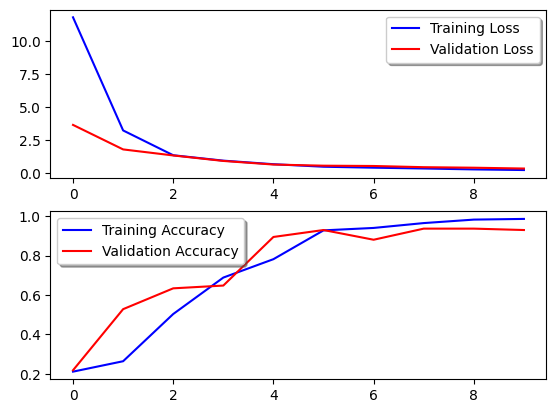

In [12]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [13]:
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

5/5 [==============================] - 0s 5ms/step - loss: 0.3555 - accuracy: 0.9296 - precision: 0.9407 - recall: 0.8944
Test Accuracy : 92.96%


5/5 [==============================] - 0s 3ms/step


<Axes: >

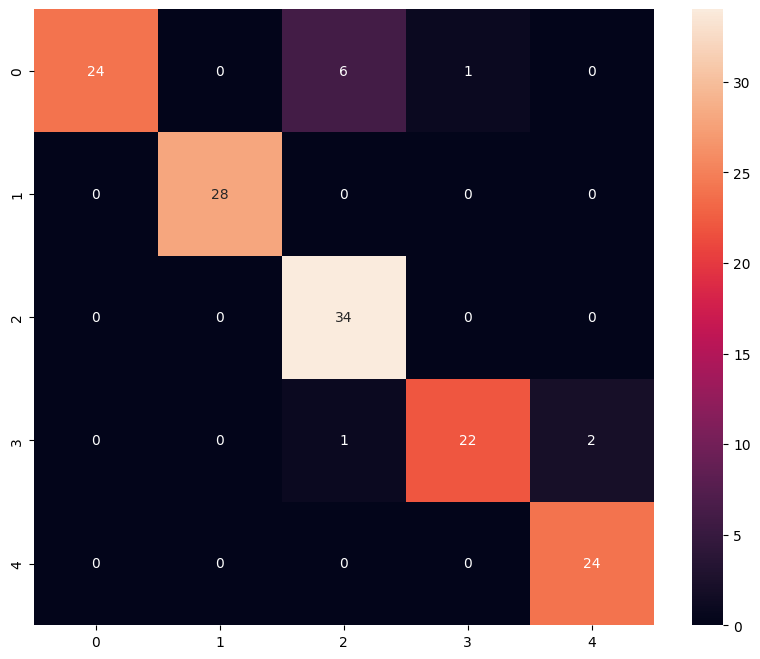

In [14]:
# Predict the values from the testing dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        31
           1       1.00      1.00      1.00        28
           2       0.83      1.00      0.91        34
           3       0.96      0.88      0.92        25
           4       0.92      1.00      0.96        24

    accuracy                           0.93       142
   macro avg       0.94      0.93      0.93       142
weighted avg       0.94      0.93      0.93       142



In [16]:
model.save('VGGish_model.h5')

/home/hassan/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
